# Exercise 13

This particular Automobile Data Set includes a good mix of categorical values as well as continuous values and serves as a useful example that is relatively easy to understand. Since domain understanding is an important aspect when deciding how to encode various categorical values - this data set makes a good case study.

Read the data into Pandas

In [1]:
import pandas as pd

# Define the headers since the data does not have any
headers = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration",
           "num_doors", "body_style", "drive_wheels", "engine_location",
           "wheel_base", "length", "width", "height", "curb_weight",
           "engine_type", "num_cylinders", "engine_size", "fuel_system",
           "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm",
           "city_mpg", "highway_mpg", "price"]

# Read in the CSV file and convert "?" to NaN
df = pd.read_csv("http://mlr.cs.umass.edu/ml/machine-learning-databases/autos/imports-85.data",
                  header=None, names=headers, na_values="?" )
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [2]:
df.shape

(205, 26)

In [3]:
df.dtypes

symboling              int64
normalized_losses    float64
make                  object
fuel_type             object
aspiration            object
num_doors             object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_cylinders         object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

In [4]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,engine_type,num_cylinders,fuel_system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [5]:
df.isnull().sum()

symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_doors             2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_cylinders         0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

# Exercise 13.1

Does the database contain missing values? If so, replace them using one of the methods explained in class

In [6]:
#se revisa la existencia de missing values
obj_df.isnull().sum()

make               0
fuel_type          0
aspiration         0
num_doors          2
body_style         0
drive_wheels       0
engine_location    0
engine_type        0
num_cylinders      0
fuel_system        0
dtype: int64

In [63]:
obj_df['num_doors']= obj_df['num_doors'].fillna(obj_df['num_doors'].mode()[0])

In [64]:
obj_df.num_doors.value_counts()

four    116
two      89
Name: num_doors, dtype: int64

In [66]:
numeric_df = df.select_dtypes(include=['float64','int64']).copy()
numeric_df.head()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


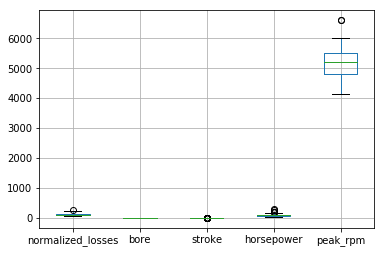

In [68]:
import matplotlib.pyplot as plt
numeric_df.boxplot(['normalized_losses','bore','stroke','horsepower','peak_rpm'])

In [70]:
for p in ['normalized_losses','bore','stroke','horsepower','peak_rpm','price']:
       numeric_df[p].fillna(numeric_df[p].median(), inplace = True) 

In [71]:
numeric_df.isnull().sum()

symboling            0
normalized_losses    0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_size          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

# Exercise 13.2

Split the data into training and testing sets

Train a Random Forest Regressor to predict the price of a car using the nominal features

In [72]:
numeric_df1=numeric_df.drop(['price'], axis=1)

In [74]:
y = numeric_df['price']

In [76]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y_train, y_test = train_test_split(numeric_df1, y, test_size=0.3, random_state=42)

In [83]:
from sklearn.ensemble import RandomForestRegressor
clf1 = RandomForestRegressor()

In [84]:
clf1.fit(X1_train, y_train)

C:\Users\Sony\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [85]:
from sklearn import metrics
import numpy as np

In [86]:
y1_pred = clf1.predict(X1_test)

In [87]:
print('MAE:', metrics.mean_absolute_error(y_test, y1_pred))
print('MSE:', metrics.mean_squared_error(y_test, y1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y1_pred)))

MAE: 1630.5279082697116
MSE: 5352767.773920952
RMSE: 2313.604930389143


# Exercise 13.3

Create dummy variables for the categorical features

Train a Random Forest Regressor and compare

In [30]:
X.columns

Index(['make', 'fuel_type', 'aspiration', 'num_doors', 'body_style',
       'drive_wheels', 'engine_location', 'engine_type', 'num_cylinders',
       'fuel_system'],
      dtype='object')

In [31]:
col=['make', 'fuel_type', 'aspiration', 'num_doors', 'body_style',
       'drive_wheels', 'engine_location', 'engine_type', 'num_cylinders',
       'fuel_system']

for d in col: 

In [32]:
X_dummy.head()

,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,...,num_cylinders_twelve,num_cylinders_two,fuel_system_1bbl,fuel_system_2bbl,fuel_system_4bbl,fuel_system_idi,fuel_system_mfi,fuel_system_mpfi,fuel_system_spdi,fuel_system_spfi
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_dummy, y, test_size=0.3, random_state=42)

In [38]:
from sklearn.ensemble import RandomForestRegressor
clf2 = RandomForestRegressor()

In [39]:
clf2.fit(X_train, y_train)

C:\Users\Sony\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [41]:
y_pred2=clf2.predict(X_test)

In [43]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred2)

14777732.867028449

# Exercise 13.4

Apply two other methods of categorical encoding

compare the results

In [62]:
#Variables binarias

import category_encoders as ce
Xbi_train = ce.BinaryEncoder().fit_transform(X_train)
Xbi_test = ce.BinaryEncoder().fit_transform(X_test)

Xbi_train.head()

,make_0,make_1,make_2,make_3,make_4,make_5,fuel_type_0,fuel_type_1,aspiration_0,aspiration_1,...,engine_type_2,engine_type_3,num_cylinders_0,num_cylinders_1,num_cylinders_2,num_cylinders_3,fuel_system_0,fuel_system_1,fuel_system_2,fuel_system_3
177,0,0,0,0,0,1,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
75,0,0,0,0,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1
174,0,0,0,0,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
31,0,0,0,0,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,1
12,0,0,0,1,0,0,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1


In [61]:
clf3 = RandomForestRegressor()
clf3.fit(Xbi_train, y_train)

y_pred3=clf3.predict(Xbi_test)
mean_squared_error(y_test, y_pred3)

C:\Users\Sony\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


103183400.71580136

In [117]:
X_train.shape

(143, 10)

In [119]:
Xpl = ce.PolynomialEncoder().fit_transform(X)
Xpl_train, Xpl_test, y_train, y_test = train_test_split(Xpl, y, test_size=0.3, random_state=42)

In [120]:
Xpl.isnull().sum()

intercept            0
make_0               0
make_1               0
make_2               0
make_3               0
make_4               0
make_5               0
make_6               0
make_7               0
make_8               0
make_9               0
make_10              0
make_11              0
make_12              0
make_13              0
make_14              0
make_15              0
make_16              0
make_17              0
make_18              0
make_19              0
make_20              0
fuel_type_0          0
aspiration_0         0
num_doors_0          0
body_style_0         0
body_style_1         0
body_style_2         0
body_style_3         0
drive_wheels_0       0
drive_wheels_1       0
engine_location_0    0
engine_type_0        0
engine_type_1        0
engine_type_2        0
engine_type_3        0
engine_type_4        0
engine_type_5        0
num_cylinders_0      0
num_cylinders_1      0
num_cylinders_2      0
num_cylinders_3      0
num_cylinders_4      0
num_cylinde

In [122]:
clf4= RandomForestRegressor()
clf4.fit(Xpl_train, y_train)

y_pred4=clf4.predict(Xpl_test)
mean_squared_error(y_test, y_pred4)

C:\Users\Sony\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


16001855.16346924